In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Logistic Regression regularization

**W sklearnie za regularyzację odpowiada parametr C i jest on odwrotnoscią parametru $\lambda$, tzn. $C = \frac{1}{\lambda}$. Zatem im mniejsze C, tym silniejsza regularyzacja.**

In [54]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

# 1D - example

Spróbujmy zbudować klasyfikator wykrywający typ Iris-Virginica oparty tylko na funkcji szerokości płatka (jedna wspórzędna).

In [55]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

/tmp/ipykernel_62589/3487688992.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0


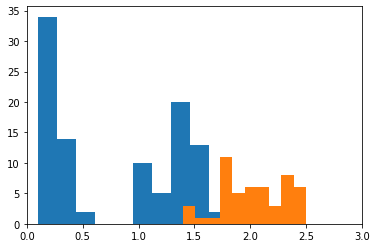

In [56]:
plt.hist(X[y==0, :])
plt.hist(X[y==1, :])
plt.xlim(0,3)
plt.show()

# Zad

Wykonaj algorytm LogisticRegression z 
* C = 1

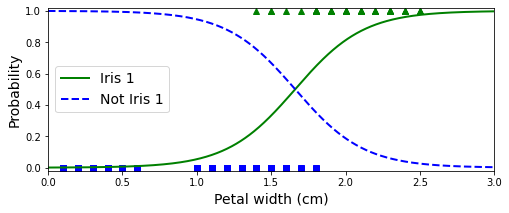

In [57]:
from sklearn.linear_model import LogisticRegression
log_reg_1 = LogisticRegression(C = 1, random_state=42)
log_reg_1.fit(X, y)

from sklearn.linear_model import LogisticRegression

log_reg_1 = LogisticRegression(C = 1, random_state=42)
log_reg_1.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba_1 = log_reg_1.predict_proba(X_new)

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba_1[:, 1], "g-", linewidth=2, label="Iris 1")
plt.plot(X_new, y_proba_1[:, 0], "b--", linewidth=2, label="Not Iris 1")

plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

# Zad

Wykonaj algorytm LogisticRegression z 
* C = 10

In [58]:
log_reg_2 = LogisticRegression(C = 10, random_state=42)
log_reg_2.fit(X, y)
X_new2 = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba_2 = log_reg_2.predict_proba(X_new)


# Zad

Wykonaj algorytm LogisticRegression z 
* C = 100

In [59]:
log_reg_3 = LogisticRegression(C = 100, random_state=42)
log_reg_3.fit(X, y)
X_new3 = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba_3 = log_reg_3.predict_proba(X_new)

# Zad

Narysuj wszystkie funkcje na jednym wykresie.

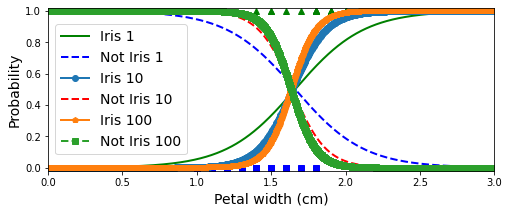

In [60]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba_1[:, 1], "g-", linewidth=2, label="Iris 1")
plt.plot(X_new, y_proba_1[:, 0], "b--", linewidth=2, label="Not Iris 1")
plt.plot(X_new2, y_proba_2[:, 1], "o-", linewidth=2, label="Iris 10")
plt.plot(X_new2, y_proba_2[:, 0], "r--", linewidth=2, label="Not Iris 10")
plt.plot(X_new3, y_proba_3[:, 1], "p-", linewidth=2, label="Iris 100")
plt.plot(X_new3, y_proba_3[:, 0], "s--", linewidth=2, label="Not Iris 100")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

# Example 2D

In [61]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

/tmp/ipykernel_62589/4008263761.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


# Zad

Wykonaj algorytm LogisticRegression z 
* C = 1

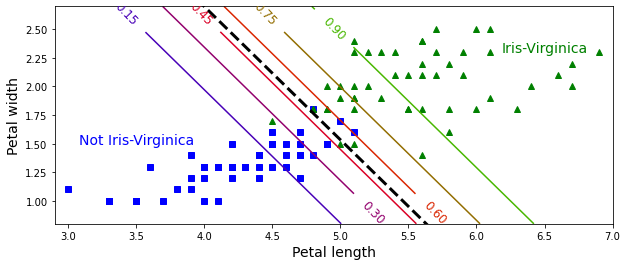

In [62]:
log_reg_1 = LogisticRegression(C=1, random_state=42)
log_reg_1.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba_1 = log_reg_1.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba_1[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary1 = -(log_reg_1.coef_[0][0] * left_right + log_reg_1.intercept_[0]) / log_reg_1.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary1, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

# Zad

Wykonaj algorytm LogisticRegression z 
* C = 10

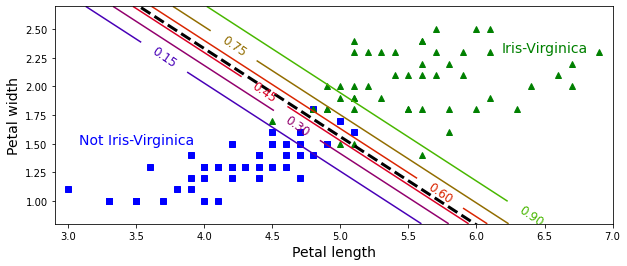

In [63]:
log_reg_1 = LogisticRegression(C=10, random_state=42)
log_reg_1.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba_1 = log_reg_1.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba_1[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary2 = -(log_reg_1.coef_[0][0] * left_right + log_reg_1.intercept_[0]) / log_reg_1.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary2, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

# Zad

Wykonaj algorytm LogisticRegression z 
* C = 100

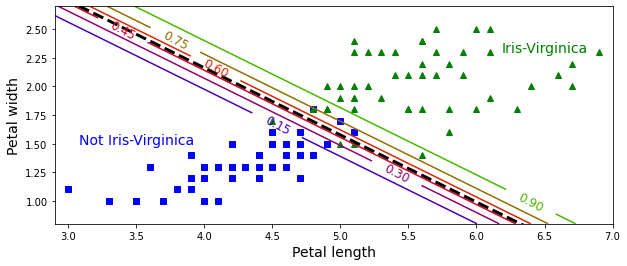

In [64]:
log_reg_1 = LogisticRegression(C=100, random_state=42)
log_reg_1.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba_1 = log_reg_1.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba_1[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary3 = -(log_reg_1.coef_[0][0] * left_right + log_reg_1.intercept_[0]) / log_reg_1.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary3, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

# Zad

Narysuj wszystkie funkcje na jednym wykresie.

(2.9, 7.0, 0.8, 2.7)

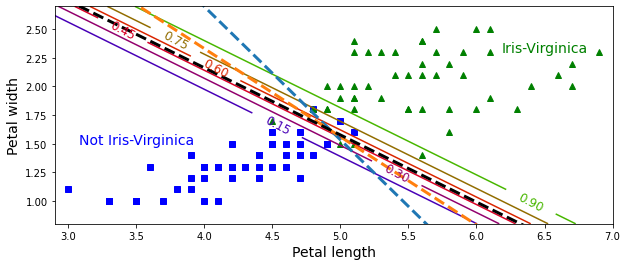

In [65]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba_1[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary1, "o--", linewidth=3)
plt.plot(left_right, boundary2, "p--", linewidth=3)
plt.plot(left_right, boundary3, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
